C:\Users\hameh\AppData\Local\Temp\ipykernel_7748\626043732.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Age'].fillna(X['Age'].mean(), inplace=True)
C:\Users\hameh\AppData\Local\Temp\ipykernel_7748\626043732.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'].fillna(X['Age'].mean(), inplace=True)


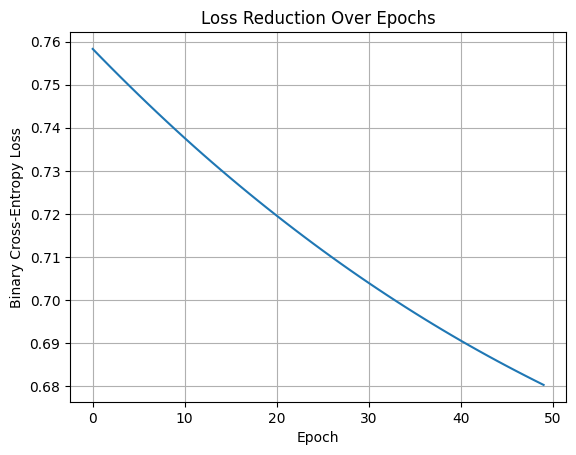


Discussion:
- Manual backpropagation is tricky mainly because applying the chain rule through multiple layers needs careful attention.
- Shape mismatches and wrong derivatives are common sources of error.
- Frameworks like TensorFlow and PyTorch automate this with automatic differentiation.



In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Load Dataset
data = pd.read_csv('Titanic-Dataset.csv')
X = data[['Pclass', 'Age', 'SibSp', 'Fare']]
y = data['Survived']

# 2. Preprocessing
X['Age'].fillna(X['Age'].mean(), inplace=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 3. Initialize network
np.random.seed(42)
n_input = X_train.shape[1]
n_hidden = 5

W1 = np.random.randn(n_input, n_hidden)
b1 = np.zeros((1, n_hidden))
W2 = np.random.randn(n_hidden, 1)
b2 = np.zeros((1, 1))

# Activation functions
def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return (Z > 0).astype(float)

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def sigmoid_derivative(Z):
    s = sigmoid(Z)
    return s * (1 - s)

# Loss
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-8
    return -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))

# 4. Train
learning_rate = 0.01
n_epochs = 50
losses = []
y_train = y_train.values.reshape(-1, 1)

for epoch in range(n_epochs):
    # Forward pass
    Z1 = np.dot(X_train, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    
    # Compute loss
    loss = binary_cross_entropy(y_train, A2)
    losses.append(loss)
    
    # Backprop
    dZ2 = A2 - y_train
    dW2 = np.dot(A1.T, dZ2) / X_train.shape[0]
    db2 = np.sum(dZ2, axis=0, keepdims=True) / X_train.shape[0]
    
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X_train.T, dZ1) / X_train.shape[0]
    db1 = np.sum(dZ1, axis=0, keepdims=True) / X_train.shape[0]
    
    # Update weights
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

# 5. Plot Loss
plt.plot(range(n_epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('Loss Reduction Over Epochs')
plt.grid()
plt.show()

# 6. Discussion
print("""
Discussion:
- Manual backpropagation is tricky mainly because applying the chain rule through multiple layers needs careful attention.
- Shape mismatches and wrong derivatives are common sources of error.
- Frameworks like TensorFlow and PyTorch automate this with automatic differentiation.
""")
